# <font color = purple> **Trabalho Cálculo 3°Ciclo CD**
### Mariana Kobayashi e Julia Molitzas

## <font color = purple> **1- Regressões Polinomiais**

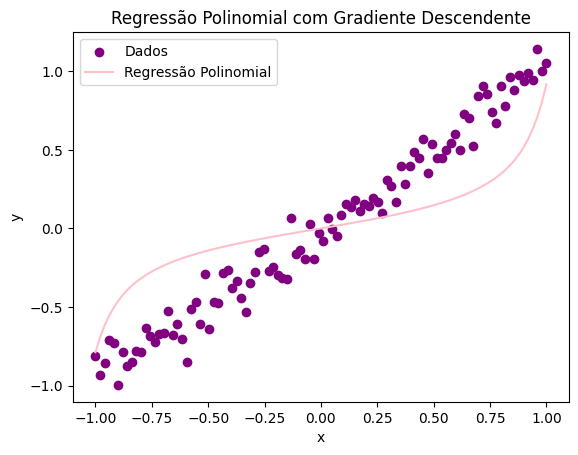

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função polinomial 0.01 * x^22 + x
def polynomial_function(x):
    return 0.01 * x**22 + x

# Gerando dados para a regressão
np.random.seed(0)
X = np.linspace(-1, 1, 100)
y = polynomial_function(X) + np.random.normal(0, 0.1, X.shape)  # Adicionando ruído

# Preparando os dados para regressão polinomial de grau 22
degree = 22
def prepare_polynomial_features(X, degree):
    X_poly = np.zeros((X.shape[0], degree + 1))
    for i in range(degree + 1):
        X_poly[:, i] = X**i
    return X_poly

X_poly = prepare_polynomial_features(X, degree)

# Inicializando os parâmetros theta
theta = np.zeros(X_poly.shape[1])

# Definindo a função de custo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Implementando o gradiente descendente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Definindo os parâmetros de treinamento
learning_rate = 1e-4
iterations = 10000

# Executando o gradiente descendente
theta, cost_history = gradient_descent(X_poly, y, theta, learning_rate, iterations)

# Plotando os dados e a linha de regressão polinomial
plt.scatter(X, y, color='purple', label='Dados')
plt.plot(X, X_poly.dot(theta), color='pink', label='Regressão Polinomial')
plt.title("Regressão Polinomial com Gradiente Descendente")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## <font color = purple> **2- Regressão Logística**

### A base utilizada é o "🐧 Palmer's Penguins Dataset", disponível no Kaggle via link:
https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification/data



In [64]:
#Importando Bibliotecas

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt



In [65]:
# Carregando e Visualizando o conjunto de dados
data = pd.read_csv('penguins_binary_classification.csv')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009


In [66]:
# Verificando valores ausentes
print(data.isnull().sum())

# Tratamento de valores ausentes (exemplo: imputação por média)
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)

# Codificação de variáveis categóricas (exemplo: island)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['island'] = le.fit_transform(data['island'])

# Separando variáveis ​​preditoras e variável alvo
X = data.drop('species', axis=1)
y = data['species']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando as variáveis numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64


In [67]:
# Reduzindo a dimensionalidade com PCA
pca = PCA(n_components=2)  # Definindo o número de componentes principais
pca.fit(X_train_scaled)

# Transformando os conjuntos de treino e teste
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)




In [68]:
# Treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_pca, y_train)


LogisticRegression()

In [69]:
# Fazendo previsões sobre o conjunto de teste
y_pred = model.predict(X_test_pca)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:\n', confusion_matrix)


Acurácia: 1.0
Matriz de Confusão:
 [[30  0]
 [ 0 25]]


## <font color = purple> **3- Resolver uma Integral "irresolvível" por meio do método de Monte Carlo**

Integral aproximada de e^(-x^2) de -10 a 10 usando 1000000 pontos é 1.7702049109126683


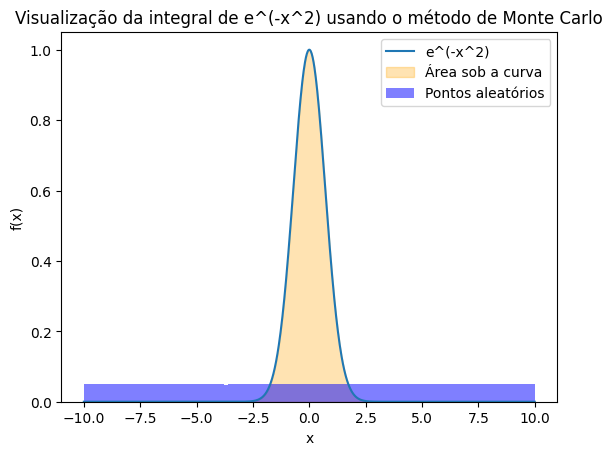

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função que queremos integrar
def func(x):
    return np.exp(-x**2)

# Definindo os limites da integração
a = -10  # limite inferior
b = 10   # limite superior

# Número de pontos aleatórios
N = 1000000

# Gerando N pontos aleatórios entre a e b
x_random = np.random.uniform(a, b, N)

# Calculando a soma das avaliações da função nesses pontos
sum_f = np.sum(func(x_random))

# Calculando a integral aproximada
integral_approx = (b - a) * sum_f / N

print(f'Integral aproximada de e^(-x^2) de {a} a {b} usando {N} pontos é {integral_approx}')

# Visualização
x = np.linspace(a, b, 1000)
y = func(x)

plt.plot(x, y, label='e^(-x^2)')
plt.fill_between(x, y, alpha=0.3, color='orange', label='Área sob a curva')
plt.hist(x_random, bins=100, density=True, alpha=0.5, label='Pontos aleatórios', color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Visualização da integral de e^(-x^2) usando o método de Monte Carlo')
plt.show()
